In [1]:
import pandas as pd
from textblob import TextBlob, Word, Blobber
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in pre-election headlines data
answers_pre = pd.read_csv('religious_answers_pre.csv')
answers_pre = pd.DataFrame(answers_pre)
answers_pre.shape

(719, 10)

In [3]:
# Read in post-election headlines data
answers_post = pd.read_csv('religious_answers_post.csv')
answers_post = pd.DataFrame(answers_post)
answers_post.shape

(690, 10)

In [4]:
def detect_polarity(text):
    '''
    Applies sentiment analysis to a piece of text.
    Returns polarity with 1 as pos and 0 as neg.
    '''
    return TextBlob(text).sentiment.polarity

In [5]:
# Find polarity of each headline in pre-election dataset
polarity_pre = []
for i in range(answers_pre.shape[0]):
    polarity_pre.append(detect_polarity(answers_pre.iloc[i,2]))

len(polarity_pre)

719

In [6]:
# Find polarity of each headline in post-election dataset
polarity_post = []
for i in range(answers_post.shape[0]):
    polarity_post.append(detect_polarity(answers_post.iloc[i,2]))
len(polarity_post)

690

In [7]:
# Add polarity scores to dataframe
answers_pre['Polarity'] = polarity_pre
answers_post['Polarity'] = polarity_post

In [8]:
print('Pre-Election Average Sentiment', answers_pre['Polarity'].mean())
print('Post-Election Average Sentiment', answers_post['Polarity'].mean())

Pre-Election Average Sentiment 0.0029476967168205006
Post-Election Average Sentiment 0.0028647342995169085


In [9]:
answers_pre['Election'] = "Pre"
answers_post['Election'] = "Post"

# Combine pre and post headlines into one dataframe
all_answers = pd.concat([answers_pre, answers_post])

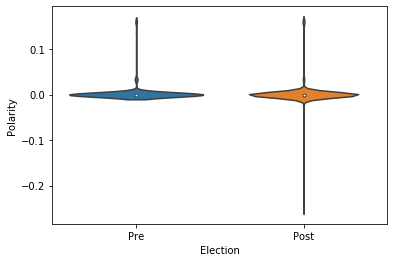

In [10]:
sns.violinplot(y='Polarity', x='Election', data=all_answers)
#all_headlines.boxplot(by =['Election'], column =['Polarity'])

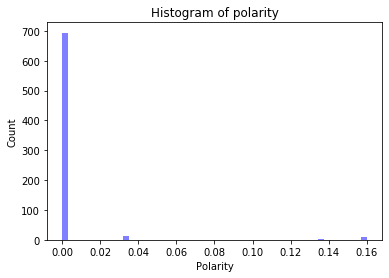

In [11]:
num_bins = 50
n, bins, patches = plt.hist(answers_pre.Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

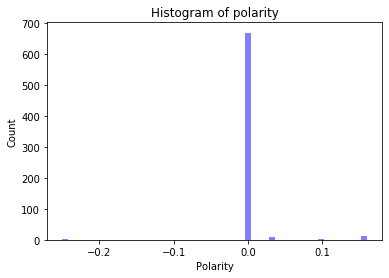

In [12]:
num_bins = 50
n, bins, patches = plt.hist(answers_post.Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

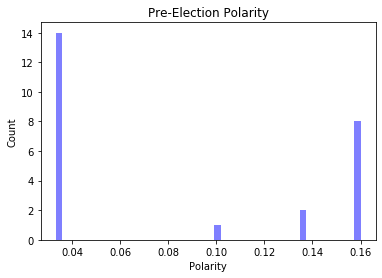

In [15]:
filter_pre = answers_pre[answers_pre['Polarity']!=0] #remove 0s to get a clearer picture

num_bins = 50
n, bins, patches = plt.hist(filter_pre.Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Pre-Election Polarity')
plt.show()

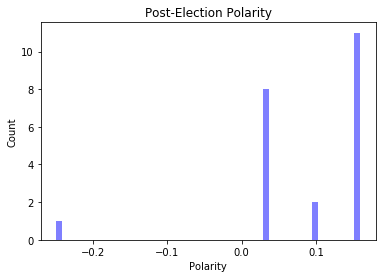

In [16]:
filter_post = answers_post[answers_post['Polarity']!=0] #remove 0s to get a clearer picture

num_bins = 50
n, bins, patches = plt.hist(filter_post.Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Post-Election Polarity')
plt.show()